In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sn

In [21]:
df = pd.read_csv('housing.csv')
df['ocean_proximity'] = df['ocean_proximity'].replace({'INLAND': 0, 'NEAR BAY': 1, '<1H OCEAN': 2, 'NEAR OCEAN': 3, 'ISLAND': 4 })
df['median_income']=df['median_income']*10000

# Testing accuracy
# print(mod.cv_results_['mean_test_mae_score'])
# print(df['median_house_value'].sum()/df.shape[0])
# mod.cv_results_['mean_test_mae_score']/(df['median_house_value'].sum()/df.shape[0])



In [22]:
onehot = OneHotEncoder()
ocean = df[["ocean_proximity"]].copy()
ocean_onehot = onehot.fit_transform(ocean)


In [23]:
X = df.drop('median_house_value', axis=1, index=None)
y = pd.DataFrame(df, columns=['median_house_value'], index=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

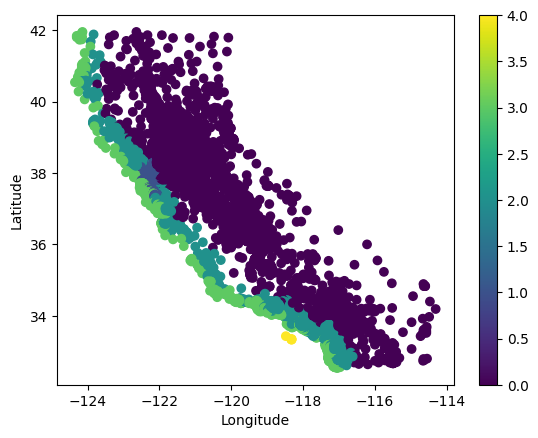

In [24]:
plt.scatter(df['longitude'], df['latitude'], c=df['ocean_proximity'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

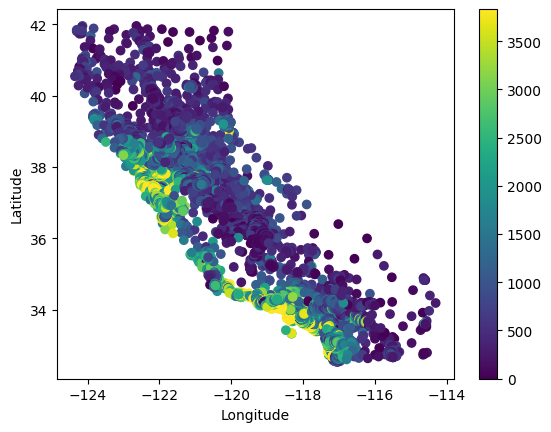

In [25]:
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

# There seems to be a correlation between the areas with the highest median house value and the ocean proximity.
# The higher the median house value, the closer the households may be to the ocean (specially between 33 and 38 latitude)

In [26]:
# house type 0 means it is not a luxury home. 
df['house_type'] = 0

# a luxury home is defined by a near coast household within the limits that appear to be the highest in value.
luxury_home = (df['latitude'] > 33) & (df['latitude'] < 39) & (df['longitude'] < -117) & (df['longitude'] > -123) & (df['ocean_proximity'].isin([2, 3, 4]))

df.loc[luxury_home, 'house_type'] = 1

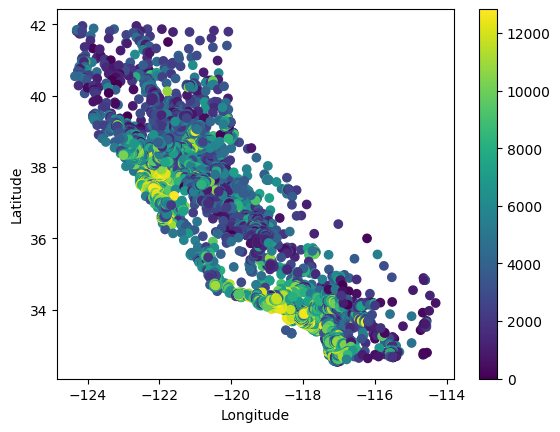

In [27]:
plt.scatter(df['longitude'], df['latitude'], c=df['median_income'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

# There seems to be a direct correlation between the areas with the highest median house value and the median income.
# The higher the median house value, the higher the median income

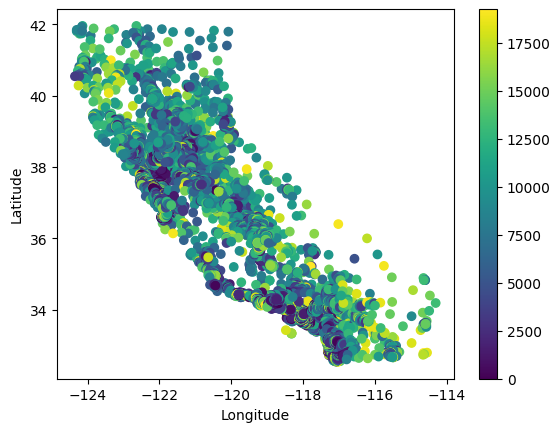

In [28]:
df['bedroomsPerHome'] = df['total_bedrooms'] / df['total_rooms']

plt.scatter(df['longitude'], df['latitude'], c=df['bedroomsPerHome'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

# It appears to show a negative correlation: Homes more on the east (INLAND) seem to have more bedrooms. 
# Bigger homes wehre the land may be cheaper

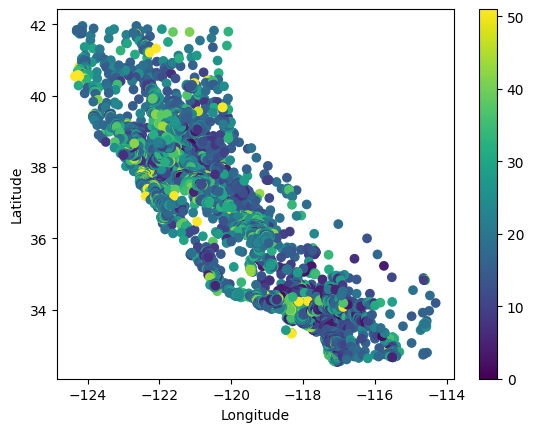

In [29]:
plt.scatter(df['longitude'], df['latitude'], c=df['housing_median_age'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

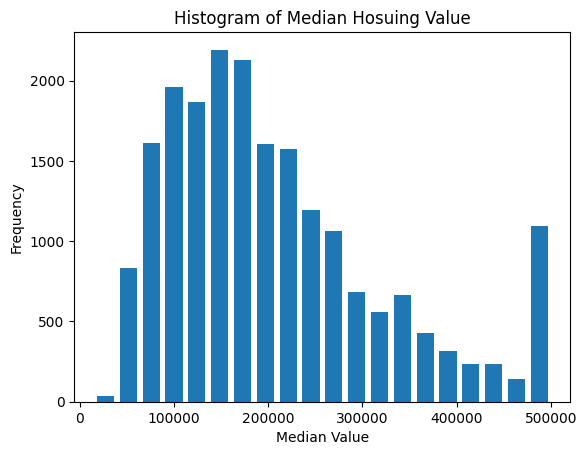

In [30]:
# create a histogram of the housingMedianAge column
plt.hist(df['median_house_value'], rwidth=0.75, bins=20)

# set the axis labels and title
plt.xlabel('Median Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median Hosuing Value')

# show the plot
plt.show()

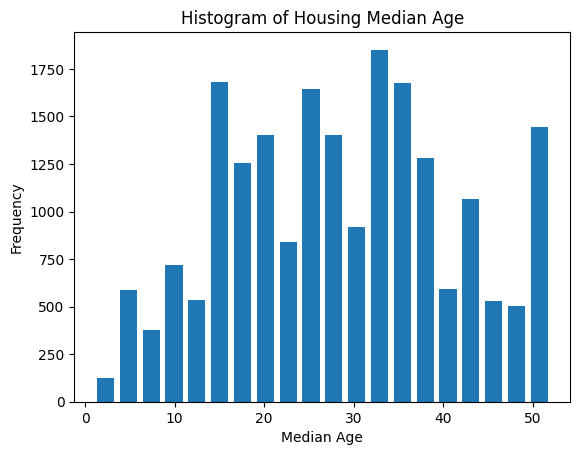

In [31]:
# create a histogram of the Median House Value
plt.hist(df['housing_median_age'], rwidth=0.75, bins=20)

# set the axis labels and title
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Median Age')

# show the plot
plt.show()

In [32]:
df['house_age_group'] = 0

new_home = df['housing_median_age'] < 15
normal_home = (df['housing_median_age']) > 15 & (df['housing_median_age'] < 30)
old_home = df['housing_median_age'] > 30

df.loc[new_home, 'house_age_group'] = 3
df.loc[normal_home, 'house_age_group'] = 2
df.loc[old_home, 'house_age_group'] = 1

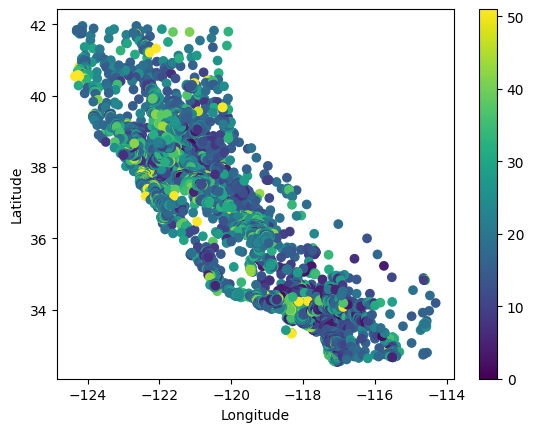

In [33]:
plt.scatter(df['longitude'], df['latitude'], c=df['housing_median_age'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

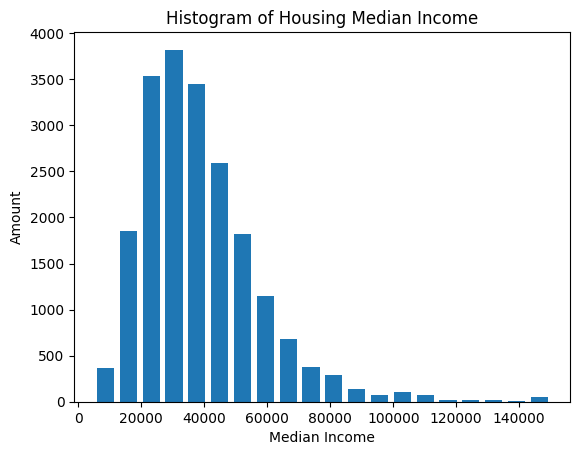

In [34]:
# create a histogram of the housingMedianAge column
plt.hist(df['median_income'], rwidth=0.75, bins=20)

# set the axis labels and title
plt.xlabel('Median Income')
plt.ylabel('Amount')
plt.title('Histogram of Housing Median Income')

# show the plot
plt.show()

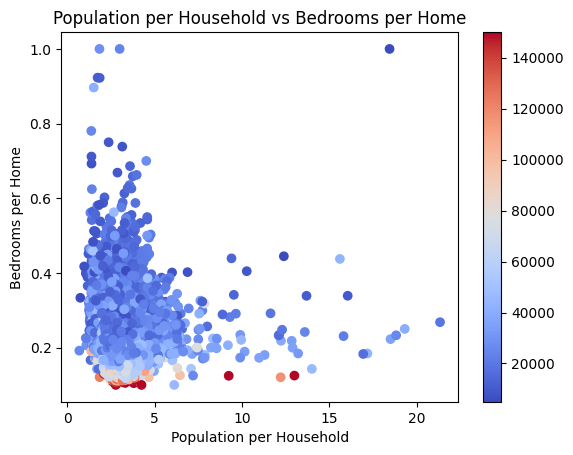

In [35]:
df['population_per_household'] = df['population'] / df['households']
df['bedroomsPerHome'] = df['total_bedrooms'] / df['total_rooms']


# More than 25 people per household
outliers = df['population_per_household']>25
df_filtered = df[~outliers]

# plot bedrooms per room against number of households
plt.scatter(df_filtered['population_per_household'], df_filtered['bedroomsPerHome'],c=df_filtered['median_income'], cmap='coolwarm')
plt.colorbar()

# set the axis labels and title
plt.xlabel('Population per Household')
plt.ylabel('Bedrooms per Home')
plt.title('Population per Household vs Bedrooms per Home')

# show the plot
plt.show()

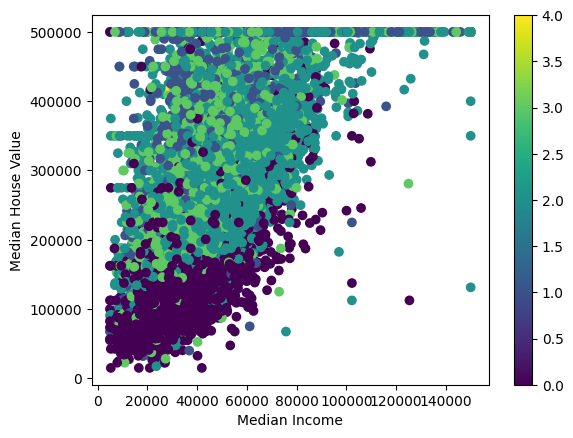

In [36]:
plt.scatter(df['median_income'], df['median_house_value'], c=df['ocean_proximity'].astype('category').cat.codes)
plt.colorbar()

# set the axis labels
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# show the plot
plt.show()

In [42]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

for model in [linear_model, tree_model, forest_model]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse:.2f}")

LinearRegression MSE: 4827905407.71
DecisionTreeRegressor MSE: 4716860419.03


/var/folders/y4/sv9ggw9s7313pj_wmn_1b4v00000gn/T/ipykernel_58828/3467494247.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor MSE: 2391377606.73


In [55]:
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8251300919422517


In [59]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

In [57]:
# Define the scorers
scorer = {
    'r2_score': make_scorer(r2_score)
}

param_grid={
    'model__n_jobs': [4],
   }

In [61]:
# Expected behaviour:
#     - If home is a luxury household, value will increase
#     - The nearest to the coast (ocean proximity), the higher the value
#     - The oldest the household is, its value may decrease
#     - The higher the median housing income the higher the median house value

mod = GridSearchCV(estimator=pipe, 
                   param_grid=param_grid,
                   scoring=scorer,
                   error_score='raise',
                   return_train_score=True,
                   refit='r2_score',
                   cv=3)

predictions = mod.fit(X_train, y_train).predict(X_test)
results = pd.DataFrame(predictions)

r2 = r2_score(y_test, y_pred)

score = mod.cv_results_['mean_test_r2_score']

print("R2 score:", r2)
print(score)

R2 score: 0.8251300919422517
[0.64112924]
